## Importación de librerias y lectura csv ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\augus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [29]:
df = pd.read_csv("1000_Companies.csv")
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [31]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
colors = {
    'New York': '#A8A77A',
    'California': '#EE8130',
    'Florida': '#6390F0',
}

## Análisis de estadísticas ##

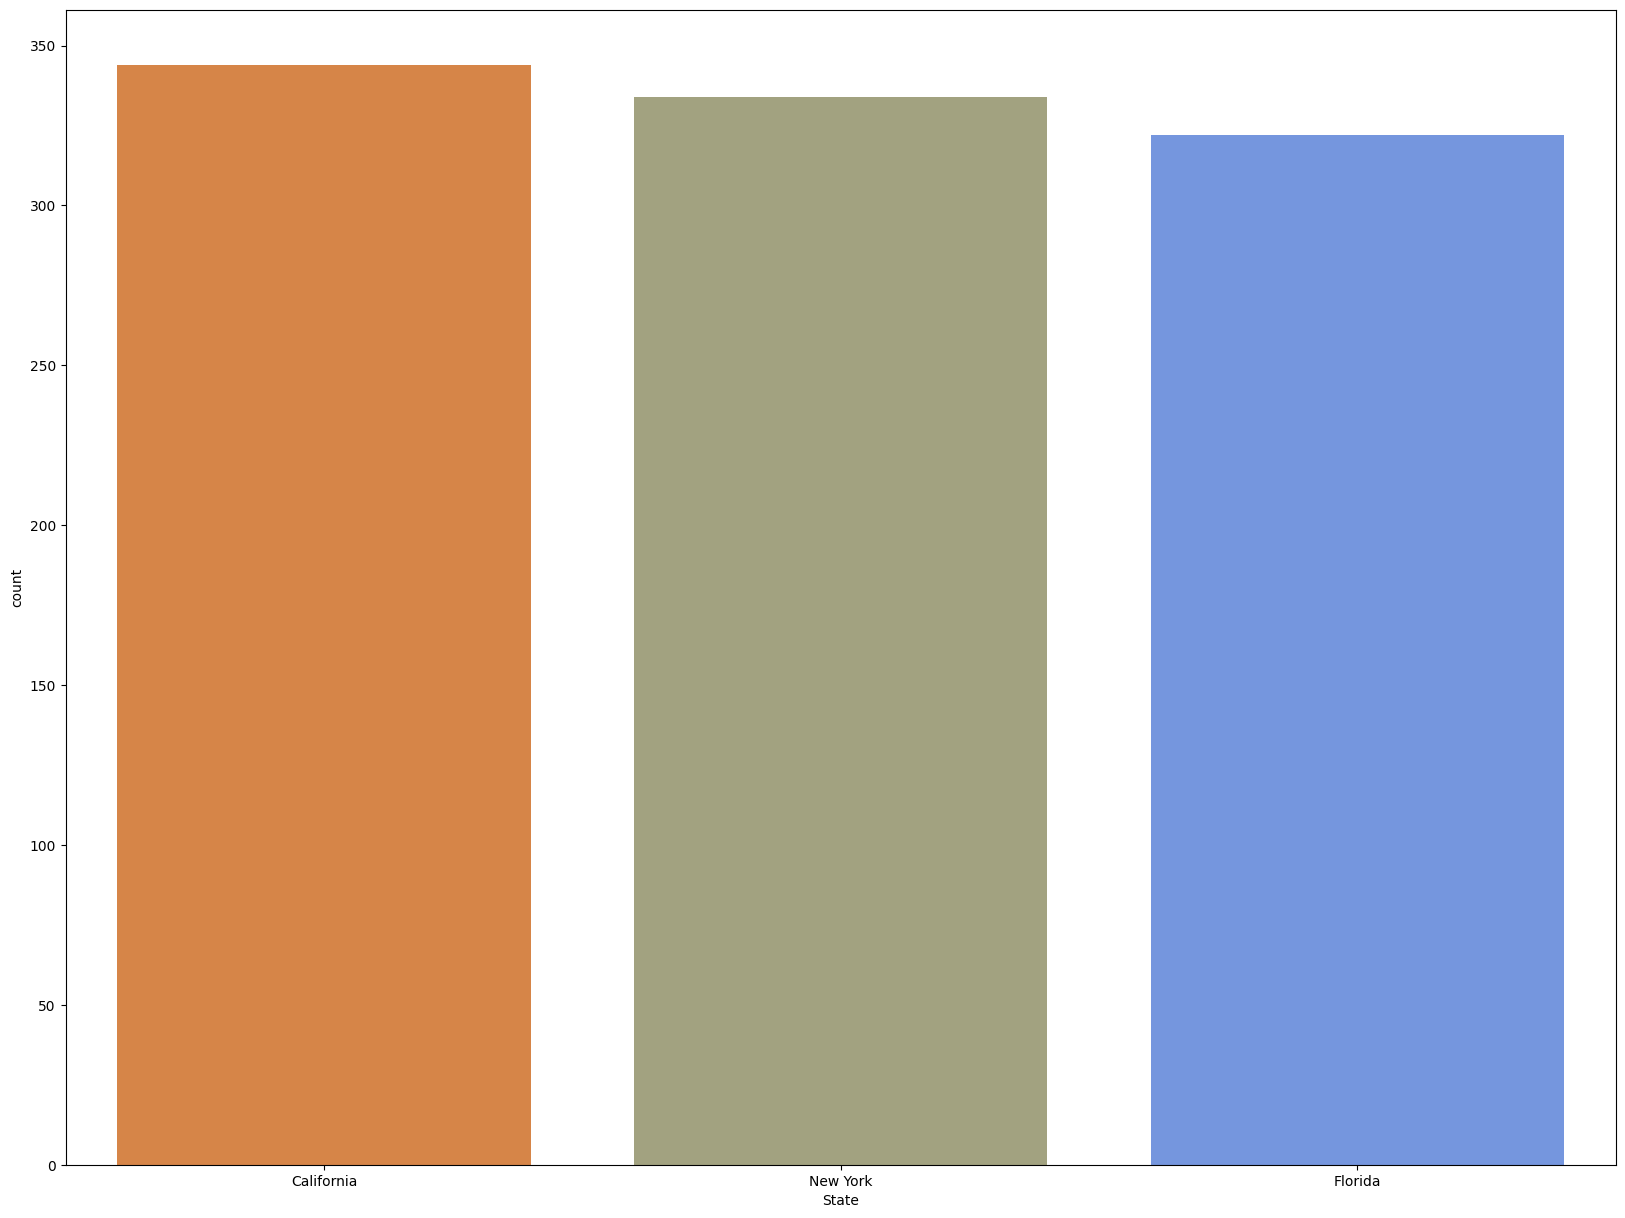

In [12]:
plt.figure(figsize=(20, 15))
sns.countplot(x='State', data=df, palette=colors, order=df['State'].value_counts().index)
# plt.xticks(rotation=-45)
plt.show()

Vemos que el dataset tiene una distribución balanceada

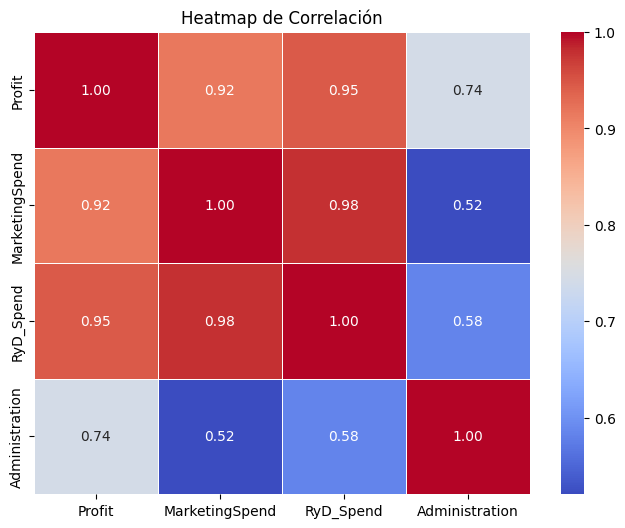

In [25]:
# Filtra las columnas de interés
columns_of_interest = ["Profit", "MarketingSpend", "RyD_Spend", "Administration"]
df_subset = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = df_subset.corr()

# Crea un heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

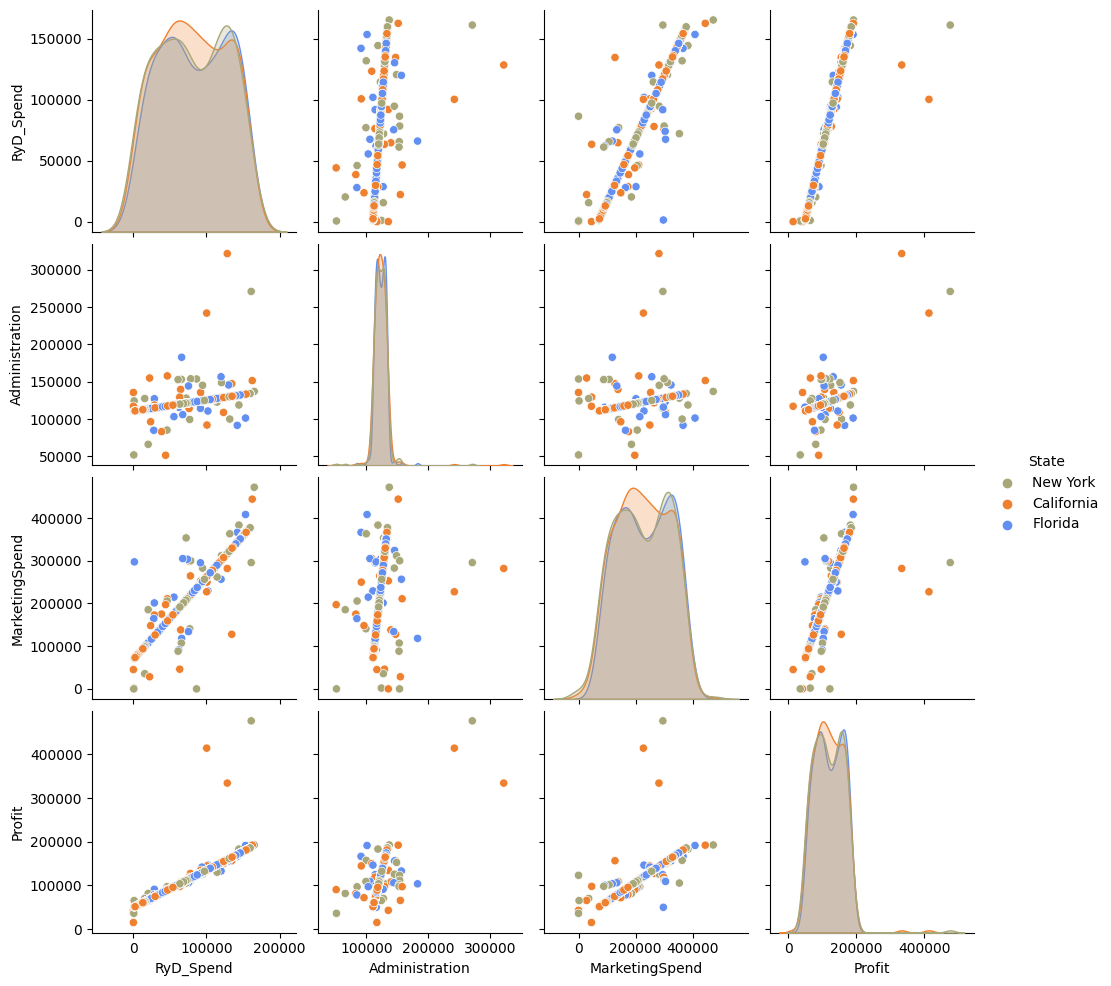

In [13]:
sns.pairplot(df, hue="State", palette=colors)

RyD_Spend

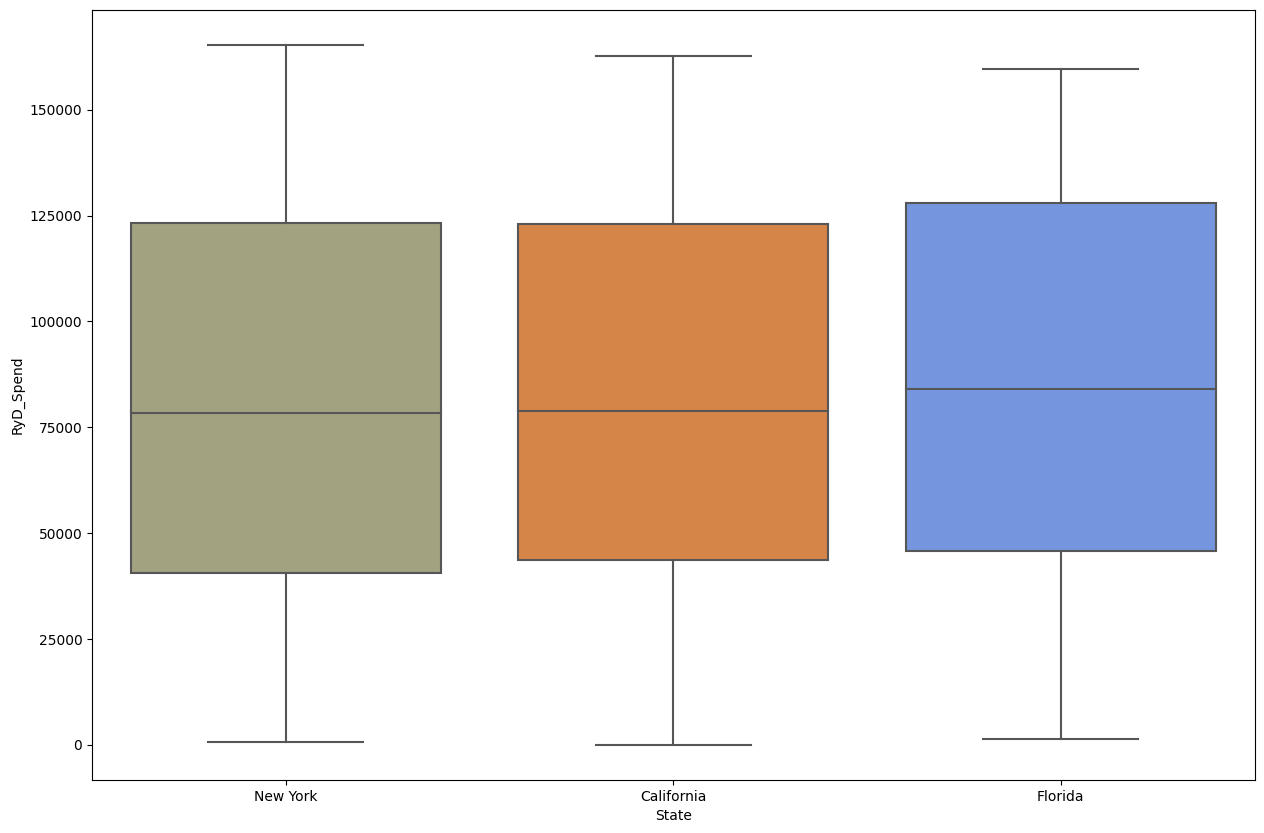

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='RyD_Spend', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

Administration

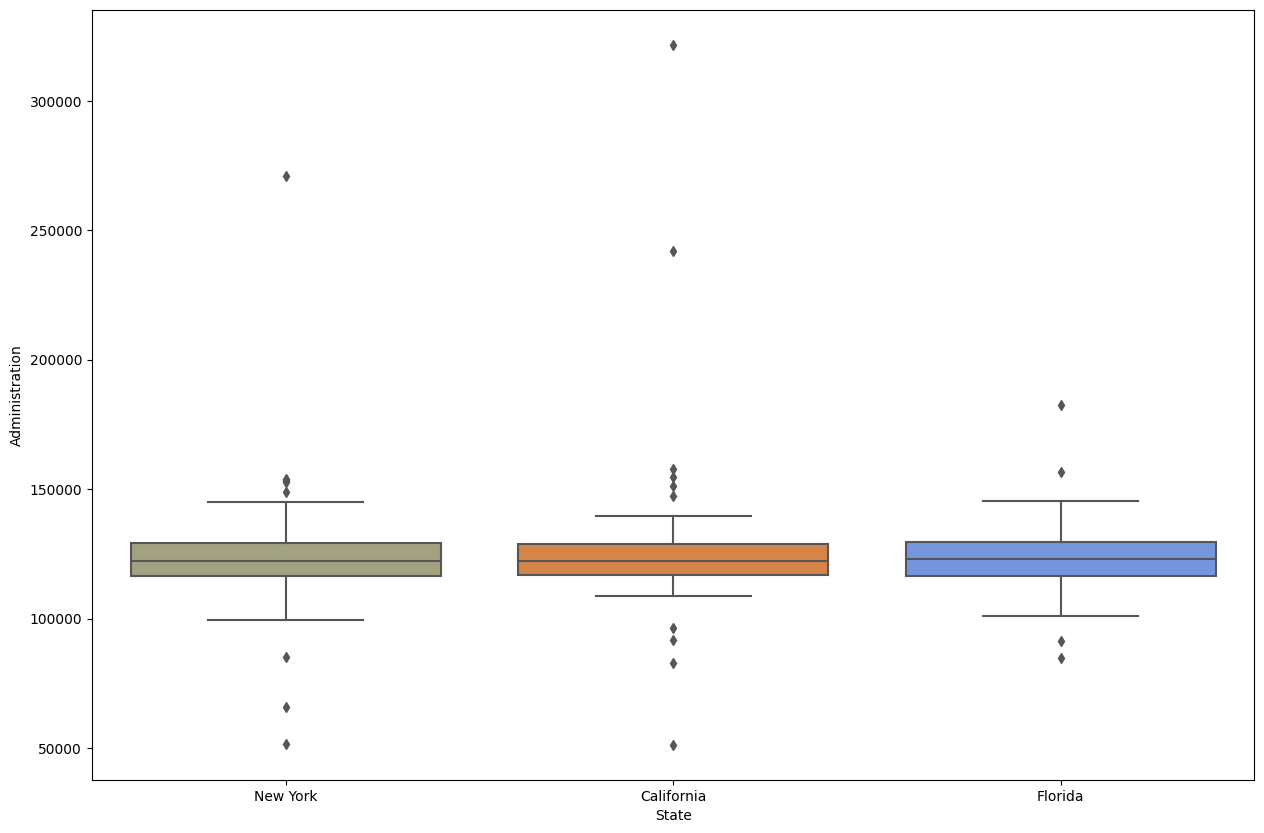

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Administration', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

MarketingSpend

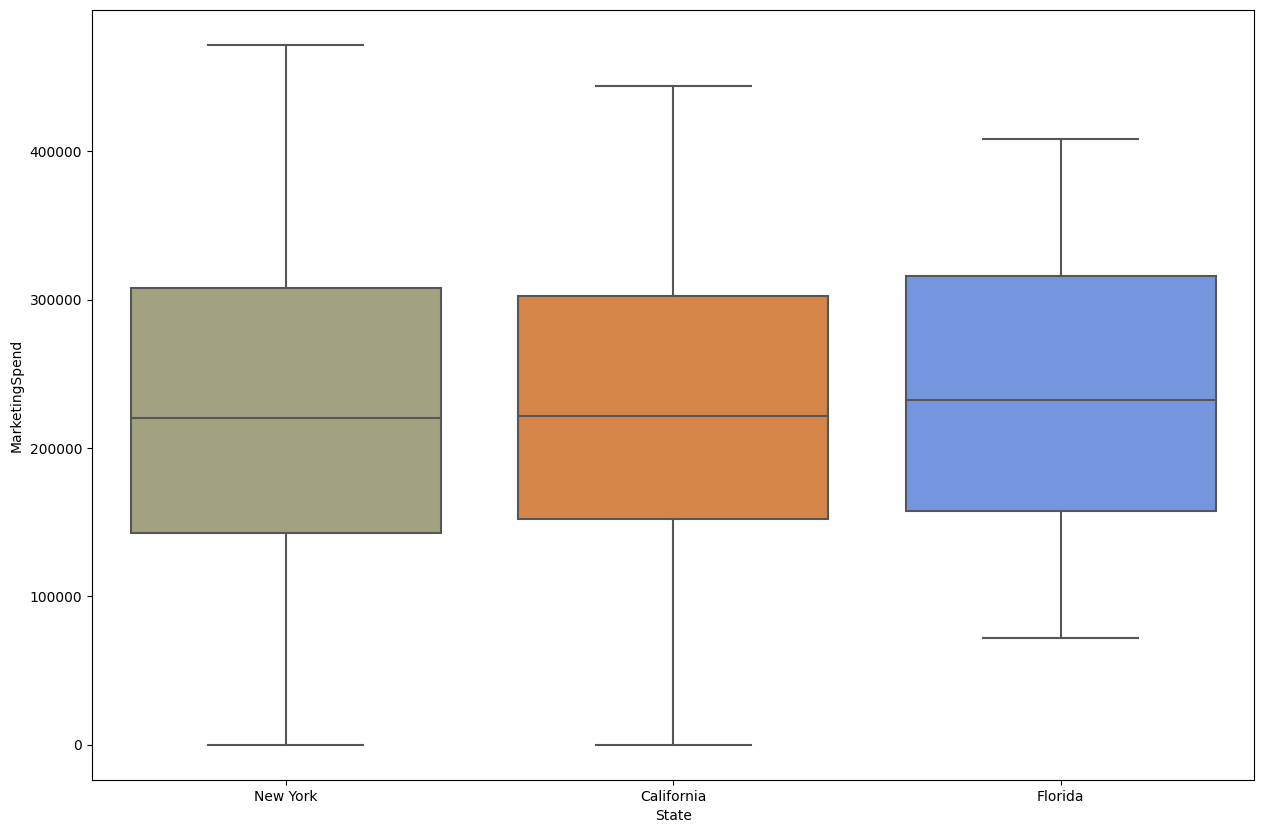

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='MarketingSpend', data=df, palette=colors)
plt.show()

Profit

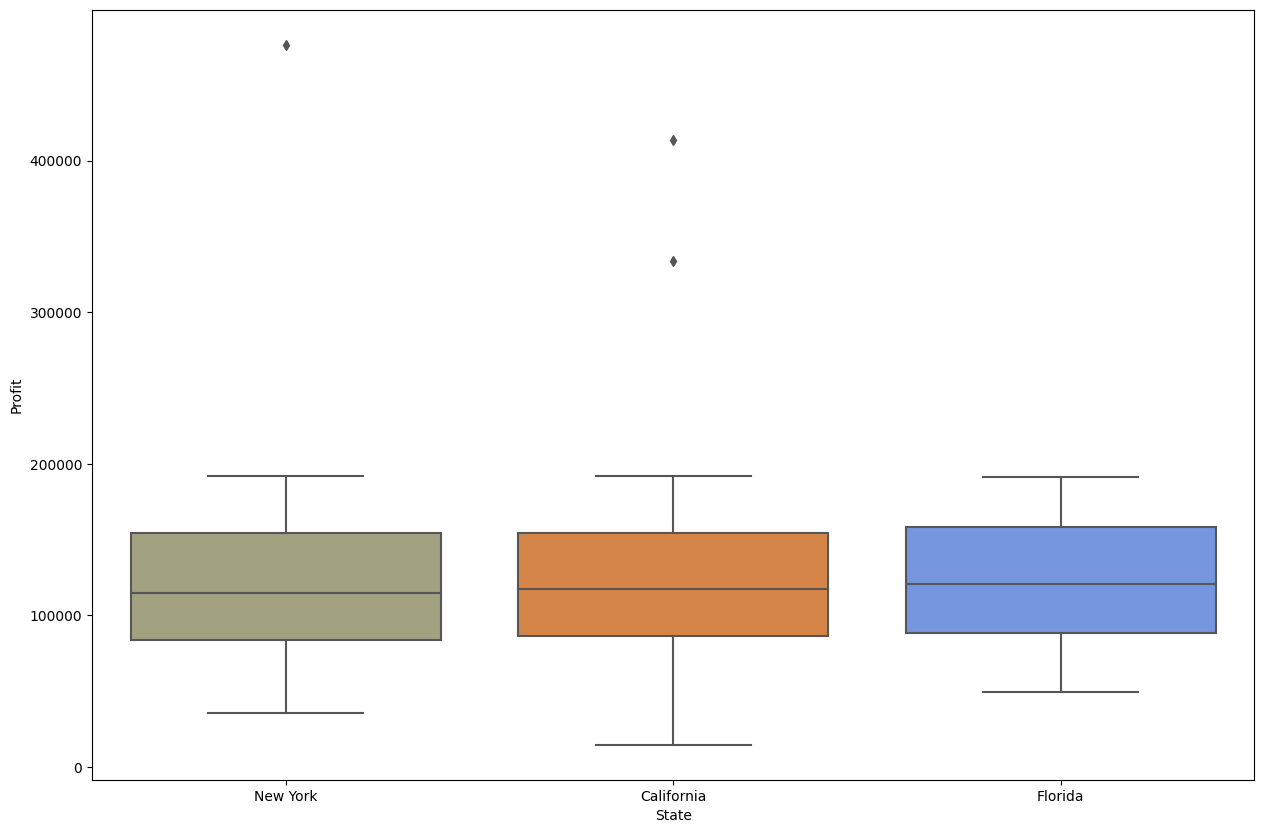

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Profit', data=df, palette=colors)
plt.show()

Observamos que las 

## Regression Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from graphviz import Source
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.get_dummies(df, columns=["State"], drop_first=True)

In [33]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,0,1
1,162597.70,151377.590,443898.5300,191792.06000,0,0
2,153441.51,101145.550,407934.5400,191050.39000,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,1
4,142107.34,91391.770,366168.4200,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,0,0
996,134970.00,130390.080,329204.0228,164336.60550,0,0
997,100275.47,241926.310,227142.8200,413956.48000,0,0
998,128456.23,321652.140,281692.3200,333962.19000,0,0


In [43]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la estandarización a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [44]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,1.799023,1.105197,2.682968,1.696301,0,1
1,1.739869,2.253692,2.378316,1.685343,0,0
2,1.543022,-1.730568,1.985407,1.668041,1,0
3,1.348048,-0.340433,1.715177,1.477956,0,1
4,1.299351,-2.504210,1.529110,1.088053,1,0
...,...,...,...,...,...,...
995,-0.591946,-0.357871,-0.578727,-0.566079,0,0
996,1.145907,0.589023,1.125271,1.044865,0,0
997,0.400018,9.435756,0.010245,6.867965,0,0
998,1.005869,15.759379,0.606202,5.001869,0,0


In [55]:
""" Decision Tree - Regression """

xCompanies = df.drop('Profit', axis=1)
yCompanies = df['Profit']
xTrain, xTest, yTrain, yTest = train_test_split(xCompanies, yCompanies, test_size=0.2)

tree_reg = tree.DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13, min_samples_leaf=1, min_samples_split=2)

regressor_tree = tree_reg.fit(xTrain, yTrain)
yCompaniesPred = tree_reg.predict(xTest)

In [56]:
from sklearn.tree import export_text
feature_list = list(xTrain.columns)
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.08
|   |--- RyD_Spend <= -0.88
|   |   |--- RyD_Spend <= -1.32
|   |   |   |--- RyD_Spend <= -1.54
|   |   |   |   |--- RyD_Spend <= -1.74
|   |   |   |   |   |--- value: [-2.07]
|   |   |   |   |--- RyD_Spend >  -1.74
|   |   |   |   |   |--- value: [-1.53]
|   |   |   |--- RyD_Spend >  -1.54
|   |   |   |   |--- Administration <= -0.81
|   |   |   |   |   |--- value: [-1.39]
|   |   |   |   |--- Administration >  -0.81
|   |   |   |   |   |--- value: [-1.27]
|   |   |--- RyD_Spend >  -1.32
|   |   |   |--- MarketingSpend <= -1.08
|   |   |   |   |--- MarketingSpend <= -1.18
|   |   |   |   |   |--- value: [-1.19]
|   |   |   |   |--- MarketingSpend >  -1.18
|   |   |   |   |   |--- value: [-1.08]
|   |   |   |--- MarketingSpend >  -1.08
|   |   |   |   |--- RyD_Spend <= -0.99
|   |   |   |   |   |--- value: [-0.99]
|   |   |   |   |--- RyD_Spend >  -0.99
|   |   |   |   |   |--- value: [-0.89]
|   |--- RyD_Spend >  -0.88
|   |   |--- RyD_Spend <= -0.39
|   |   |  

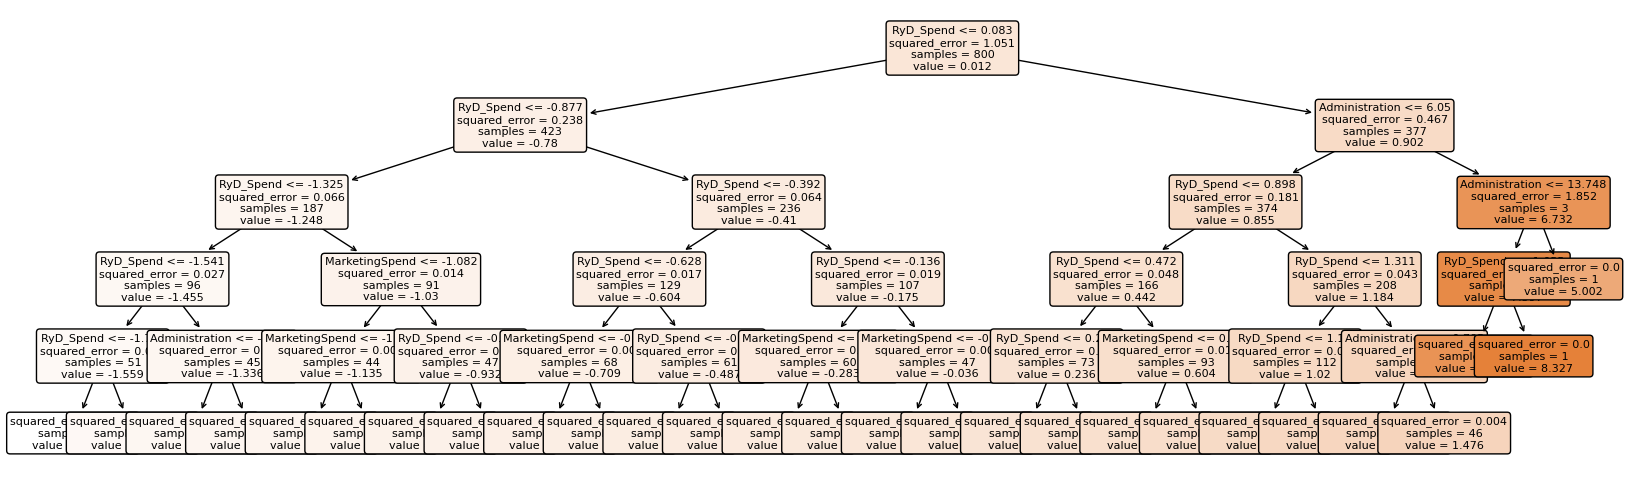

In [57]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

In [59]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xTrain, yTrain)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xTest)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(yTest, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Error cuadrático medio (MSE) en el conjunto de prueba: 0.0021290637993970833


In [60]:
xTest.head()

,RyD_Spend,Administration,MarketingSpend,State_Florida,State_New York
219,-1.524498,-0.865985,-1.493112,0,0
297,0.881387,0.444895,0.865903,0,1
490,0.596248,0.289534,0.586320,0,1
192,-0.614670,-0.370252,-0.601009,0,0
97,1.140941,0.586317,1.120401,0,0


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test = yTest.astype(float)

mae = mean_absolute_error(yTest, yCompaniesPred)
mse = mean_squared_error(yTest, yCompaniesPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, yCompaniesPred) # medida de la bondad de ajuste del modelo

#primero calculamos el error absoluto porcentual (APE) para cada predicción y luego calculamos el MAPE promediando estos errores.
mape = np.mean(np.abs((yTest - yCompaniesPred) / y_test) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(yTest)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores
rmse = np.sqrt(mse)

# Imprimir MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 11.995073069353168
Mean Absolute Error (MAE): 0.045908476149396284
Mean Squared Error (MSE): 0.004623626651474369
Root Mean Squared Error (RMSE): 0.0679972547348374
R-squared (R2): 0.9941707674521979
R-squared adjusted (R2 ajustado): 0.9940205294999349
Root Mean Squared Error (RMSE): 0.0679972547348374


In [64]:
tableResult = pd.DataFrame({'Actual':yTest, 'Predicted':yCompaniesPred})
tableResult

,Actual,Predicted
219,-1.430530,-1.392941
297,0.799662,0.725087
490,0.535346,0.499177
192,-0.587143,-0.555012
97,1.040262,1.121578
...,...,...
223,1.459205,1.476383
341,1.082312,1.121578
968,1.267072,1.283806
73,0.064967,0.150828


In [48]:
export_graphviz(tree_reg, out_file="companies.dot", feature_names=xCompanies.columns, class_names=yCompanies, rounded=True,
filled=True)
Source.from_file("companies.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH